# Phase 3: Advanced Analytics - RFM Customer Segmentation

**Team:** Code Serpents

**Team Member:** G.A.Dilsara Thiranjaya

---

## Executive Summary

This notebook implements a comprehensive RFM (Recency, Frequency, Monetary) analysis to segment customers of "Unique Gifts Ltd." based on their purchasing behavior. The analysis will help identify high-value customers, at-risk segments, and opportunities for targeted marketing strategies.

## Objectives

1. **Calculate RFM Metrics**: Compute Recency, Frequency, and Monetary values for each customer
2. **Assign RFM Scores**: Use quintile-based scoring (1-5) for each RFM dimension
3. **Customer Segmentation**: Map RFM scores to descriptive business segments

---

## 1. Setup and Data Loading

In [1]:
# Import required libraries
import sys
import os

# Add the src directory to Python path
sys.path.append('../src')

# Import our custom RFM analyzer
from rfm_segmentation import RFMAnalyzer, load_and_validate_data
from data_cleaning import clean_dataset

# Standard libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings

# Suppress warnings for cleaner output
warnings.filterwarnings('ignore')

# Set display options
pd.set_option('display.max_columns', None) # Display all columns of the DataFrame without truncation
pd.set_option('display.max_rows', 100) # Display a maximum of 100 rows in the DataFrame

print("📦 All libraries imported successfully!")
print(f"📅 Analysis Date: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")

# # Load the cleaned data
# DATA_PATH = "../data/online_retail_clean.csv"

# data = load_and_validate_data(DATA_PATH)

# # Display basic information about the dataset
# print("\n📊 Dataset Overview:")
# print(f"Shape: {data.shape}")
# print(f"Date Range: {data['InvoiceDate'].min()} to {data['InvoiceDate'].max()}")
# print(f"Unique Customers: {data['Customer ID'].nunique():,}")
# print(f"Total Transactions: {data['Invoice'].nunique():,}")
# print(f"Total Revenue: £{data['TotalPrice'].sum():,.2f}")

# # Display first few rows
# print("\n🔍 Sample Data:")
# display(data.head())

📦 All libraries imported successfully!
📅 Analysis Date: 2025-08-20 08:06:44


### 1.1 Data Cleaning

In [2]:
# Load and clean the dataset
print("=" * 60)
print("PHASE 1: DATA SANITATION AND PREPROCESSING")
print("=" * 60)

# Note: Place the online_retail.csv file in the ../data/ directory
data_file_path = "../data/online_retail.csv"

# Clean the dataset using our custom function
data = clean_dataset(data_file_path)

if data is not None:
    print("\n✓ Data cleaning completed successfully!")
    print(f"Final dataset shape: {data.shape}")
    
    # Display basic information about the cleaned dataset
    print("\nCleaned Dataset Info:")
    print(data.info())
    
    # Display first few rows
    print("\nFirst 5 rows of cleaned data:")
    display(data.head())
    
else:
    print("❌ Error: Could not load the dataset.")
    print("Please ensure the 'online_retail.csv' file is placed in the '../data/' directory.")

PHASE 1: DATA SANITATION AND PREPROCESSING
=== STARTING DATA CLEANING PIPELINE ===

Data loaded successfully. Shape: (1067371, 8)
=== INITIAL DATA ASSESSMENT ===
Dataset Shape: (1067371, 8)
Total Duplicates: 34335
Memory Usage: 345.12 MB

Missing Values:
  Description: 4382 (0.41%)
  Customer ID: 243007 (22.77%)


=== CLEANING STEPS ===
Duplicates removed: 34335
Rows with missing Customer ID removed: 235151
Cancelled orders removed: 18390
Zero-price records removed: 70
Non-product records removed: 2583

=== FEATURE ENGINEERING ===
TotalPrice column created
Temporal features created
Data types converted

=== CLEANING COMPLETE ===
Final dataset shape: (776842, 15)
Data range: 2009-12-01 07:45:00 to 2011-12-09 12:50:00

✓ Data cleaning completed successfully!
Final dataset shape: (776842, 15)

Cleaned Dataset Info:
<class 'pandas.core.frame.DataFrame'>
Index: 776842 entries, 0 to 1067369
Data columns (total 15 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       -

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice,Year,Month,DayOfWeek,HourOfDay,DayName,MonthName
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom,83.4,2009,12,1,7,Tuesday,December
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.0,2009,12,1,7,Tuesday,December
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.0,2009,12,1,7,Tuesday,December
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085,United Kingdom,100.8,2009,12,1,7,Tuesday,December
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085,United Kingdom,30.0,2009,12,1,7,Tuesday,December


## 2. RFM Analysis Implementation

### 2.1 Initialize RFM Analyzer

In [3]:
# Initialize RFM analyzer
rfm_analyzer = RFMAnalyzer(data)

print("🚀 RFM Analyzer initialized successfully!")
print("Ready to perform comprehensive customer segmentation analysis.")

Data validation passed. All required columns are present.
🚀 RFM Analyzer initialized successfully!
Ready to perform comprehensive customer segmentation analysis.


### 2.2 Run Complete RFM Analysis

In [4]:
# Execute the complete RFM analysis workflow
results = rfm_analyzer.run_complete_analysis()

# Extract results for easy access
rfm_data = results['rfm_data']
rfm_scored = results['rfm_scored']
rfm_final = results['rfm_final']
segment_summary = results['segment_summary']
summary_stats = results['summary_stats']

print("\n✅ RFM Analysis completed successfully!")

🔄 Starting RFM Analysis...
📊 Calculating RFM metrics...
📈 Generating summary statistics...
🏷️ Assigning RFM scores...
🎯 Assigning segment labels...
📋 Generating segment summary...
✅ RFM Analysis Complete!

✅ RFM Analysis completed successfully!


## 3. RFM Metrics Analysis

### 3.1 Basic RFM Statistics

In [5]:
# Display comprehensive summary statistics
print("📈 RFM ANALYSIS SUMMARY STATISTICS")
print("=" * 50)

print(f"\n🔍 Analysis Overview:")
print(f"Total Customers Analyzed: {summary_stats['total_customers']:,}")
print(f"Analysis Period: {summary_stats['data_period']['start_date'].strftime('%Y-%m-%d')} to {summary_stats['data_period']['end_date'].strftime('%Y-%m-%d')}")
print(f"Snapshot Date: {summary_stats['snapshot_date'].strftime('%Y-%m-%d')}")

print(f"\n📊 Recency Statistics (Days since last purchase):")
print(summary_stats['recency_stats'])

print(f"\n🔄 Frequency Statistics (Number of transactions):")
print(summary_stats['frequency_stats'])

print(f"\n💰 Monetary Statistics (Total spent in £):")
print(summary_stats['monetary_stats'])

# Display sample of RFM data
print("\n📋 Sample RFM Data:")
display(rfm_data.head(10))

📈 RFM ANALYSIS SUMMARY STATISTICS

🔍 Analysis Overview:
Total Customers Analyzed: 5,853
Analysis Period: 2009-12-01 to 2011-12-09
Snapshot Date: 2011-12-10

📊 Recency Statistics (Days since last purchase):
count    5853.000000
mean      200.249103
std       208.528333
min         1.000000
25%        25.000000
50%        95.000000
75%       379.000000
max       739.000000
Name: Recency, dtype: float64

🔄 Frequency Statistics (Number of transactions):
count    5853.000000
mean        6.255766
std        12.763759
min         1.000000
25%         1.000000
50%         3.000000
75%         7.000000
max       375.000000
Name: Frequency, dtype: float64

💰 Monetary Statistics (Total spent in £):
count      5853.000000
mean       2918.461064
std       14335.557488
min           2.950000
25%         340.850000
50%         856.030000
75%        2240.900000
max      580987.040000
Name: Monetary, dtype: float64

📋 Sample RFM Data:


,Customer ID,Recency,Frequency,Monetary
0,12346,326,12,77556.46
1,12347,2,8,4921.53
2,12348,75,5,1658.40
3,12349,19,3,3678.69
4,12350,310,1,294.40
5,12351,375,1,300.93
6,12352,36,9,1729.54
7,12353,204,2,406.76
8,12354,232,1,1079.40
9,12355,214,2,947.61


### 3.2 RFM Scores and Segments

In [6]:
# Display RFM scores and segments
print("🏷️ RFM SCORES AND CUSTOMER SEGMENTS")
print("=" * 50)

print("\n📊 Sample of RFM Scored Data:")
display(rfm_scored.head(10))

print("\n🎯 Sample of Final Segmented Data:")
display(rfm_final.head(10))

print("\n📈 RFM Score Distribution:")
score_dist = pd.DataFrame({
    'R_Score': rfm_scored['R_Score'].value_counts().sort_index(),
    'F_Score': rfm_scored['F_Score'].value_counts().sort_index(),
    'M_Score': rfm_scored['M_Score'].value_counts().sort_index()
})
display(score_dist)

🏷️ RFM SCORES AND CUSTOMER SEGMENTS

📊 Sample of RFM Scored Data:


,Customer ID,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Segment
0,12346,326,12,77556.46,2,5,5,255
1,12347,2,8,4921.53,5,4,5,545
2,12348,75,5,1658.40,3,4,4,344
3,12349,19,3,3678.69,5,3,5,535
4,12350,310,1,294.40,2,1,2,212
5,12351,375,1,300.93,2,1,2,212
6,12352,36,9,1729.54,4,5,4,454
7,12353,204,2,406.76,2,2,2,222
8,12354,232,1,1079.40,2,1,3,213
9,12355,214,2,947.61,2,2,3,223



🎯 Sample of Final Segmented Data:


,Customer ID,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Segment,Segment
0,12346,326,12,77556.46,2,5,5,255,At-Risk Customers
1,12347,2,8,4921.53,5,4,5,545,Champions
2,12348,75,5,1658.40,3,4,4,344,Loyal Customers
3,12349,19,3,3678.69,5,3,5,535,NaN
4,12350,310,1,294.40,2,1,2,212,Hibernating
5,12351,375,1,300.93,2,1,2,212,Hibernating
6,12352,36,9,1729.54,4,5,4,454,Champions
7,12353,204,2,406.76,2,2,2,222,Hibernating
8,12354,232,1,1079.40,2,1,3,213,Hibernating
9,12355,214,2,947.61,2,2,3,223,Hibernating



📈 RFM Score Distribution:


,R_Score,F_Score,M_Score
1,1164,1171,1171
2,1173,1170,1170
3,1155,1171,1171
4,1174,1170,1170
5,1187,1171,1171


## 4. Customer Segment Analysis

### 4.1 Segment Summary Statistics

In [7]:
# Display comprehensive segment analysis
print("🎯 CUSTOMER SEGMENT ANALYSIS")
print("=" * 50)

print("\n📊 Segment Summary (Sorted by Customer Count):")
display(segment_summary)

print("\n💡 Key Segment Insights:")
print(f"• Largest Segment: {segment_summary.index[0]} ({segment_summary.iloc[0]['Customer_Count']:,} customers, {segment_summary.iloc[0]['Customer_Percentage']:.1f}%)")
print(f"• Highest Revenue Segment: {segment_summary.sort_values('Total_Revenue', ascending=False).index[0]}")
print(f"• Highest Average Spend: {segment_summary.sort_values('Avg_Monetary', ascending=False).index[0]} (£{segment_summary.sort_values('Avg_Monetary', ascending=False).iloc[0]['Avg_Monetary']:,.2f})")

# Segment distribution
print(f"\n📈 Customer Distribution Across Segments:")
segment_counts = rfm_final['Segment'].value_counts()
for segment, count in segment_counts.items():
    percentage = (count / len(rfm_final)) * 100
    print(f"• {segment}: {count:,} customers ({percentage:.1f}%)")

🎯 CUSTOMER SEGMENT ANALYSIS

📊 Segment Summary (Sorted by Customer Count):


,Customer_Count,Avg_Recency,Median_Recency,Avg_Frequency,Median_Frequency,Avg_Monetary,Median_Monetary,Total_Revenue,Customer_Percentage,Revenue_Percentage
Segment,,,,,,,,,,
Hibernating,1509,456.95,432.0,1.25,1.0,411.50,278.70,620958.98,31.64,3.86
Champions,1290,19.96,16.0,17.01,11.0,9039.34,3900.97,11660743.82,27.04,72.50
At-Risk Customers,828,368.02,373.5,4.98,4.0,1925.07,1018.48,1593957.16,17.36,9.91
Loyal Customers,692,83.54,78.0,7.64,6.0,2589.69,1619.57,1792062.46,14.51,11.14
Potential Loyalists,451,28.13,26.0,1.46,1.0,923.65,365.45,416564.78,9.45,2.59



💡 Key Segment Insights:
• Largest Segment: Hibernating (1,509.0 customers, 31.6%)
• Highest Revenue Segment: Champions
• Highest Average Spend: Champions (£9,039.34)

📈 Customer Distribution Across Segments:
• Hibernating: 1,509 customers (25.8%)
• Champions: 1,290 customers (22.0%)
• At-Risk Customers: 828 customers (14.1%)
• Loyal Customers: 692 customers (11.8%)
• Potential Loyalists: 451 customers (7.7%)


### 4.2 Detailed Segment Characteristics

In [8]:
# Analyze segment characteristics in detail
print("🔍 DETAILED SEGMENT CHARACTERISTICS")
print("=" * 50)

for segment in segment_summary.index:
    segment_data = segment_summary.loc[segment]
    
    print(f"\n🎯 {segment.upper()}:")
    print(f"   👥 Customers: {segment_data['Customer_Count']:,} ({segment_data['Customer_Percentage']:.1f}% of total)")
    print(f"   💰 Revenue: £{segment_data['Total_Revenue']:,.2f} ({segment_data['Revenue_Percentage']:.1f}% of total)")
    print(f"   📅 Avg Recency: {segment_data['Avg_Recency']:.0f} days")
    print(f"   🔄 Avg Frequency: {segment_data['Avg_Frequency']:.1f} transactions")
    print(f"   💵 Avg Monetary: £{segment_data['Avg_Monetary']:,.2f}")
    
    # Add business interpretation
    if 'Champions' in segment:
        print(f"   📝 Interpretation: These are your best customers - recent, frequent, high-value purchases")
    elif 'Loyal' in segment:
        print(f"   📝 Interpretation: Regular customers who respond well to promotions")
    elif 'At-Risk' in segment:
        print(f"   📝 Interpretation: Previously valuable customers who may be churning - need retention efforts")
    elif 'New' in segment:
        print(f"   📝 Interpretation: Recent customers with growth potential - focus on onboarding")
    elif 'Hibernating' in segment:
        print(f"   📝 Interpretation: Inactive customers - evaluate cost-effectiveness of win-back campaigns")
    elif 'Cannot Lose' in segment:
        print(f"   📝 Interpretation: High-value customers at risk - prioritize immediate retention efforts")
    else:
        print(f"   📝 Interpretation: Unique segment requiring tailored marketing approach")

🔍 DETAILED SEGMENT CHARACTERISTICS

🎯 HIBERNATING:
   👥 Customers: 1,509.0 (31.6% of total)
   💰 Revenue: £620,958.98 (3.9% of total)
   📅 Avg Recency: 457 days
   🔄 Avg Frequency: 1.2 transactions
   💵 Avg Monetary: £411.50
   📝 Interpretation: Inactive customers - evaluate cost-effectiveness of win-back campaigns

🎯 CHAMPIONS:
   👥 Customers: 1,290.0 (27.0% of total)
   💰 Revenue: £11,660,743.82 (72.5% of total)
   📅 Avg Recency: 20 days
   🔄 Avg Frequency: 17.0 transactions
   💵 Avg Monetary: £9,039.34
   📝 Interpretation: These are your best customers - recent, frequent, high-value purchases

🎯 AT-RISK CUSTOMERS:
   👥 Customers: 828.0 (17.4% of total)
   💰 Revenue: £1,593,957.16 (9.9% of total)
   📅 Avg Recency: 368 days
   🔄 Avg Frequency: 5.0 transactions
   💵 Avg Monetary: £1,925.07
   📝 Interpretation: Previously valuable customers who may be churning - need retention efforts

🎯 LOYAL CUSTOMERS:
   👥 Customers: 692.0 (14.5% of total)
   💰 Revenue: £1,792,062.46 (11.1% of total)

## 5. Data Visualizations

### 5.1 Generate All Visualizations

📊 Creating RFM distribution plots...
🎯 Creating segment analysis plots...
📊 All visualizations generated successfully!
Generated 2 visualization sets:
• Distributions Analysis
• Segments Analysis


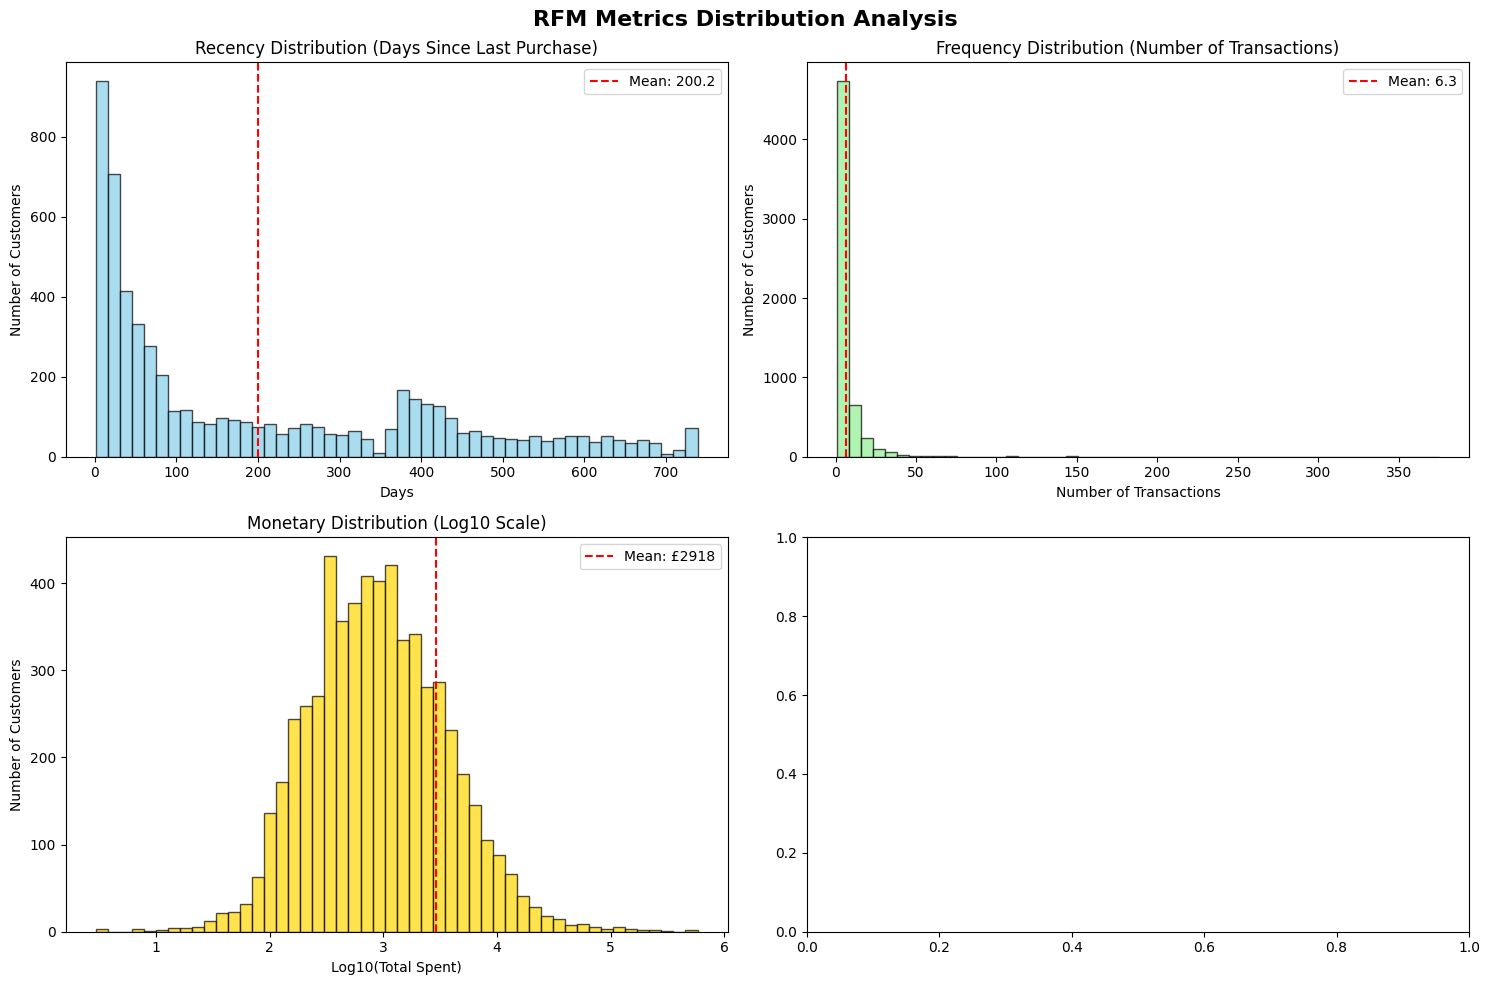

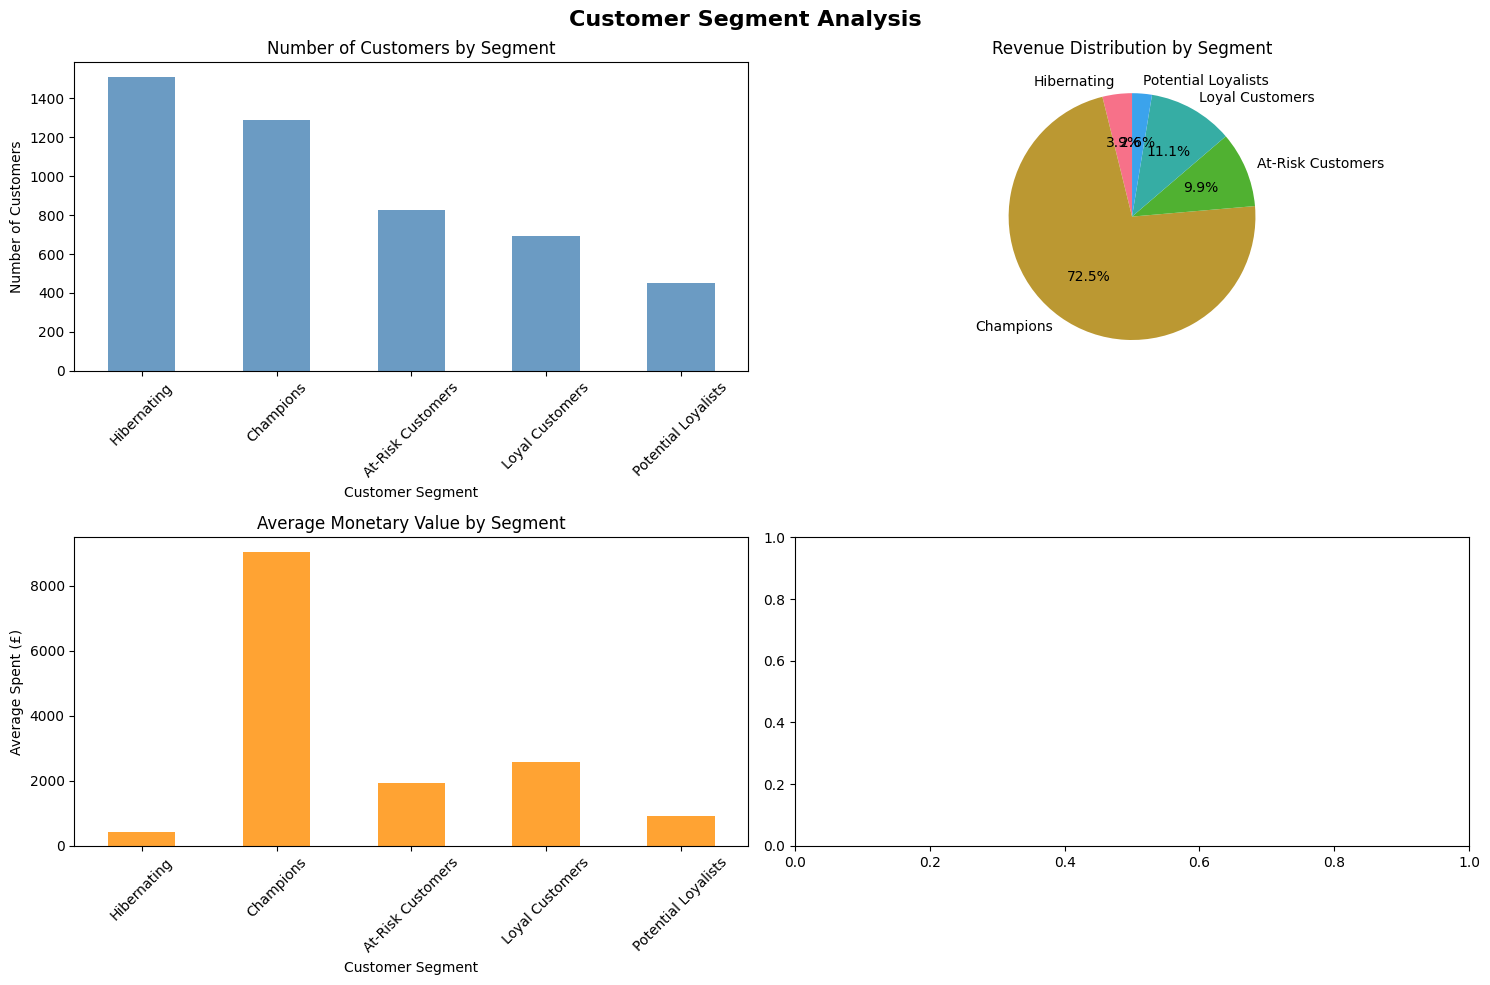

In [9]:
# Generate comprehensive visualizations
figures = rfm_analyzer.generate_visualizations()

print("📊 All visualizations generated successfully!")
print(f"Generated {len(figures)} visualization sets:")
for fig_name in figures.keys():
    print(f"• {fig_name.title()} Analysis")

**Analysis of RFM Distributions:**

- **Recency Distribution**: Shows the distribution of days since last purchase. A right-skewed distribution indicates most customers purchased recently, with a tail of customers who haven't purchased in a long time.

- **Frequency Distribution**: Displays the number of transactions per customer. Typically right-skewed, showing most customers make few purchases, while a small group makes many purchases.

- **Monetary Distribution (Log Scale)**: Shows customer spending patterns. The log scale helps visualize the wide range of spending behaviors and potential bimodal distribution suggesting retail vs. wholesale customers.

**Segment Analysis Insights:**

- **Customer Count by Segment**: Shows the relative size of each customer segment
- **Revenue Distribution**: Reveals which segments contribute most to total revenue
- **Average Monetary Value**: Identifies the highest-spending segments

## 6. Export Results

### 7.1 Export to Excel and Save charts

📊 Creating RFM distribution plots...
🎯 Creating segment analysis plots...
📁 Chart saved: ../figures/rfm_charts\distributions.png
📁 Chart saved: ../figures/rfm_charts\segments.png
✅ Results exported to ../report/rfm_analysis_results.xlsx


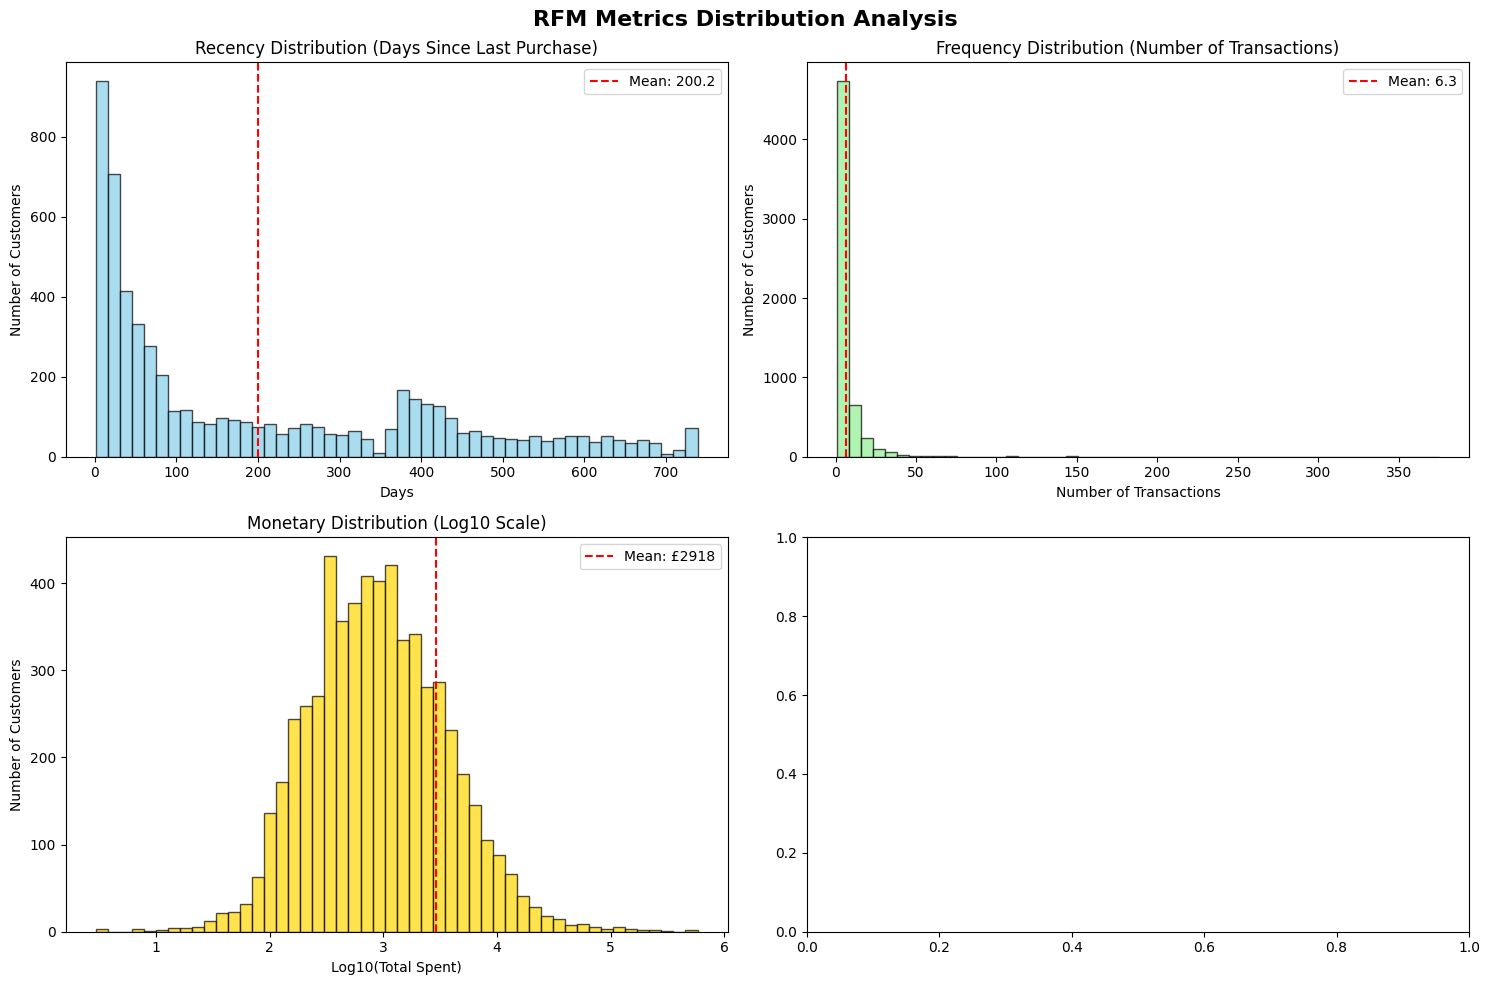

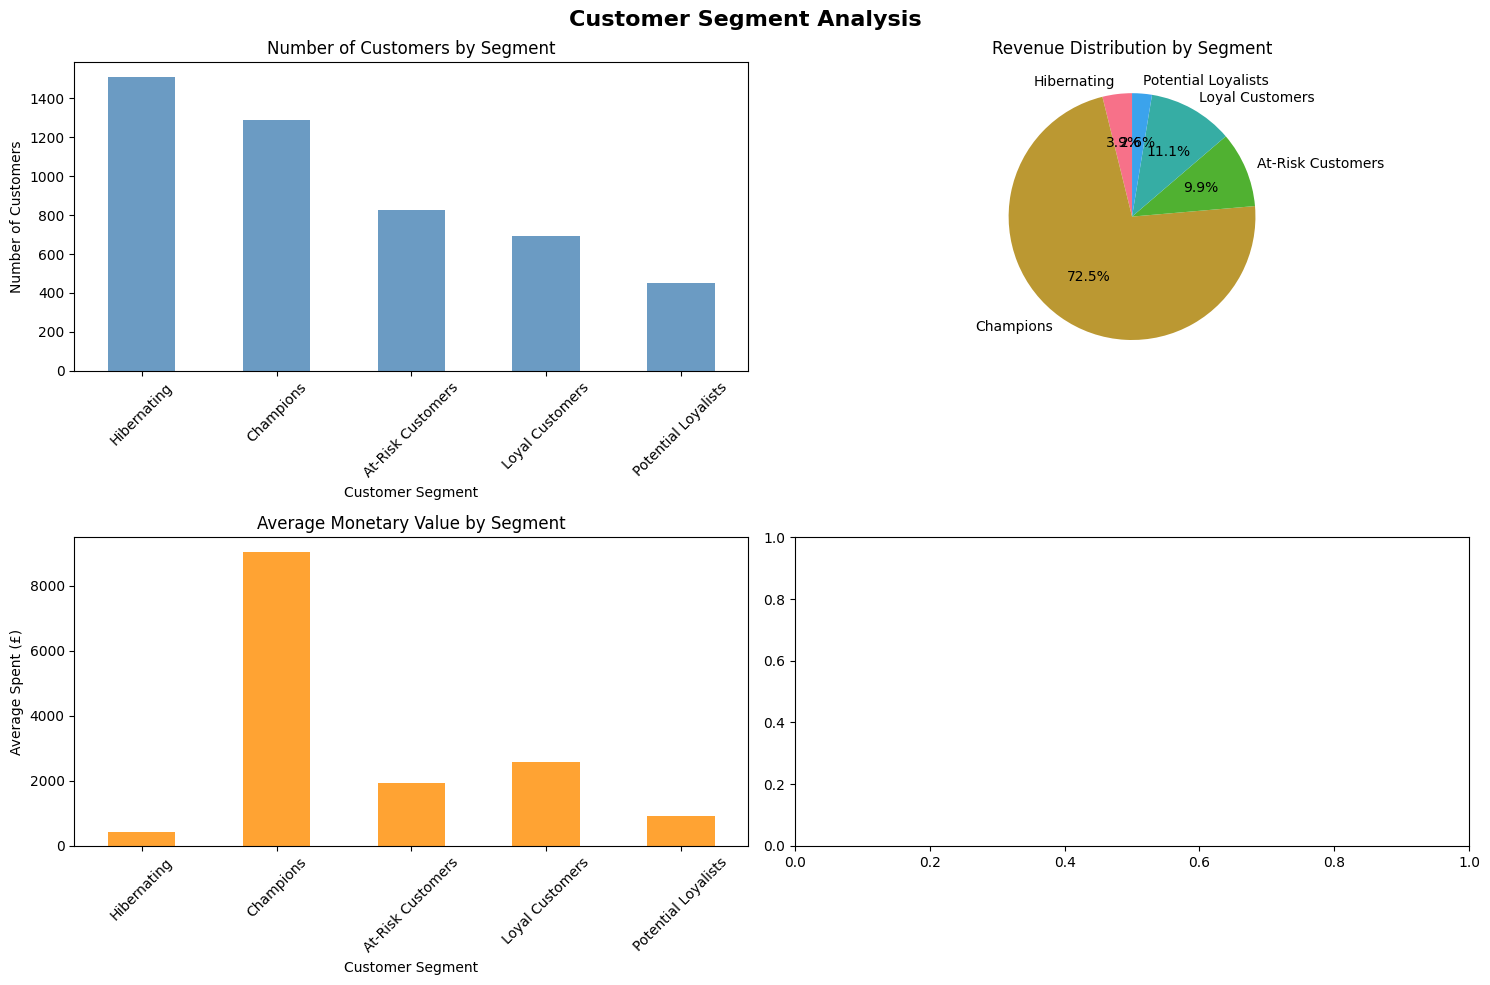

In [10]:
# Export comprehensive results to Excel and 
rfm_analyzer.export_results()

### 7.2 Save Key DataFrames for Integration

In [11]:
# Save key results for integration with other phases
output_dir = "../results/phase_3/"
os.makedirs(output_dir, exist_ok=True)

# Save individual CSV files
rfm_final.to_csv(f"{output_dir}rfm_customer_segments.csv", index=False)
segment_summary.to_csv(f"{output_dir}segment_summary_statistics.csv")

print(f"📁 Results saved to {output_dir}")
print("Files created:")
print("• rfm_customer_segments.csv")
print("• segment_summary_statistics.csv")

📁 Results saved to ../results/phase_3/
Files created:
• rfm_customer_segments.csv
• segment_summary_statistics.csv
